In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_demo = pd.read_csv(f'../../data/cleaned/df_final_demo_cleaned.csv')
df_clients = pd.read_csv(f'../../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_data = pd.read_csv(f'../../data/cleaned/df_final_web_data_cleaned.csv')

In [6]:
df_demo.head(3)

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9


In [7]:
df_clients.head(3)

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control


In [8]:
df_data.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [9]:
df_demo_numerical_cols = ['tenure_year', 'tenure_month', 'age', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month']
df_demo_categorical_cols = ['gender']

df_demo_numerical = df_demo[df_demo_numerical_cols].copy()
df_demo_categorical = df_demo[df_demo_categorical_cols].copy()

## Univariate Analysis

### Client tenure

In [10]:
# Measures if centrality and dispersion
df_demo['tenure_year'].describe()

count    70609.000000
mean        12.052950
std          6.871137
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: tenure_year, dtype: float64

In [11]:
# Display distribution
#fig = px.histogram(df_demo, x="tenure_year", marginal="box")
#fig.update_layout(height=400, width=800)
#fig.show(config={'staticPlot': True})

#### Client age

In [12]:
# Measures if centrality and dispersion
df_demo['age'].describe()

count    70609.000000
mean        46.442240
std         15.589616
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: age, dtype: float64

In [13]:
# Display distribution
fig = px.histogram(df_demo, x="age", marginal="box")
fig.update_layout(height=400, width=800)
fig.show(config={'staticPlot': True})

#### Client balance

In [14]:
# Measures if centrality and dispersion
df_demo['balance'].describe()

count    7.060900e+04
mean     1.474452e+05
std      3.014788e+05
min      1.378942e+04
25%      3.735012e+04
50%      6.334555e+04
75%      1.376355e+05
max      1.632004e+07
Name: balance, dtype: float64

In [15]:
# Display distribution
#fig = px.histogram(df_demo, x="balance", marginal="box")
#fig.update_layout(height=400, width=800)
#fig.update_layout(xaxis_range=[0,500000])
#fig.show(config={'staticPlot': True})

## Bivariate Analysis

### Age <--> Balance

In [16]:
# Display distribution
df_age_bal = pd.DataFrame({'age': pd.pivot_table(df_demo, index="age", values="balance", aggfunc='mean').index,
                           'balance_mean': pd.pivot_table(df_demo, index="age", values="balance", aggfunc='mean').balance})
fig = px.histogram(df_age_bal, x="age", y="balance_mean", nbins=20, histfunc="avg")
fig.update_layout(height=400, width=800)
fig.update_layout(yaxis_range=[0,500000])
fig.show(config={'staticPlot': True})

In [17]:
# pearson correlation
df_demo['age'].corr(df_demo['balance'], method='pearson') # linear

0.20954894886110026

## KPIs

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *

ModuleNotFoundError: No module named 'functions'

In [ ]:
# Load clean tables
df_demo = pd.read_csv('../data/cleaned/df_final_demo_cleaned.csv')
df_clients = pd.read_csv('../data/cleaned/df_final_experiment_clients_cleaned.csv')
df_data = pd.read_csv('../data/cleaned/df_final_web_data_cleaned.csv')
df_data['date_time'] = pd.to_datetime(df_data['date_time'])

In [ ]:
# merge tables and only consider clients present in all three tables
df_ = pd.merge(df_data, df_clients, on='client_id', how='inner')
df = pd.merge(df_, df_demo, on='client_id', how='inner')
df_ = df.copy()
df['client_id'] = df['client_id'].astype(str)

In [ ]:
# Add extra column indicating the day counting from the start of the trial
df["day_of_trial"] = df["date_time"].dt.dayofyear - df["date_time"].sort_values().dt.dayofyear.iloc[0]

# Add extra column to identify really unique sessions
df['unique_session_id'] = df['client_id'] + '_' + df['visit_id']

#### Problem with visit_id: there are visit_ids with more than one unique user!

In [ ]:
df.groupby('visit_id')['client_id'].nunique().sort_values().value_counts()

client_id
1    68963
2      242
Name: count, dtype: int64

In [ ]:
df.loc[df['visit_id']=='184035576_34788727758_336127']

,client_id,visitor_id,visit_id,process_step,date_time,variation,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,day_of_trial,unique_session_id
128740,5261223,405860854_50357449812,184035576_34788727758_336127,confirm,2017-04-12 23:03:17,Test,10.0,124.0,55.5,M,2,82358.68,0,3,28,5261223_184035576_34788727758_336127
128741,5261223,405860854_50357449812,184035576_34788727758_336127,step_3,2017-04-12 23:00:40,Test,10.0,124.0,55.5,M,2,82358.68,0,3,28,5261223_184035576_34788727758_336127
128742,5261223,405860854_50357449812,184035576_34788727758_336127,step_2,2017-04-12 22:59:36,Test,10.0,124.0,55.5,M,2,82358.68,0,3,28,5261223_184035576_34788727758_336127
128743,5261223,405860854_50357449812,184035576_34788727758_336127,step_1,2017-04-12 22:59:18,Test,10.0,124.0,55.5,M,2,82358.68,0,3,28,5261223_184035576_34788727758_336127
128744,5261223,405860854_50357449812,184035576_34788727758_336127,start,2017-04-12 22:58:55,Test,10.0,124.0,55.5,M,2,82358.68,0,3,28,5261223_184035576_34788727758_336127
153833,6743414,405860854_50357449812,184035576_34788727758_336127,confirm,2017-04-12 23:11:13,Control,10.0,124.0,58.5,F,2,103660.98,0,3,28,6743414_184035576_34788727758_336127
153834,6743414,405860854_50357449812,184035576_34788727758_336127,step_3,2017-04-12 23:10:28,Control,10.0,124.0,58.5,F,2,103660.98,0,3,28,6743414_184035576_34788727758_336127
153835,6743414,405860854_50357449812,184035576_34788727758_336127,step_2,2017-04-12 23:08:47,Control,10.0,124.0,58.5,F,2,103660.98,0,3,28,6743414_184035576_34788727758_336127
153836,6743414,405860854_50357449812,184035576_34788727758_336127,step_1,2017-04-12 23:07:47,Control,10.0,124.0,58.5,F,2,103660.98,0,3,28,6743414_184035576_34788727758_336127
153837,6743414,405860854_50357449812,184035576_34788727758_336127,start,2017-04-12 23:07:27,Control,10.0,124.0,58.5,F,2,103660.98,0,3,28,6743414_184035576_34788727758_336127


### Visits per day

<Axes: xlabel='day_of_trial'>

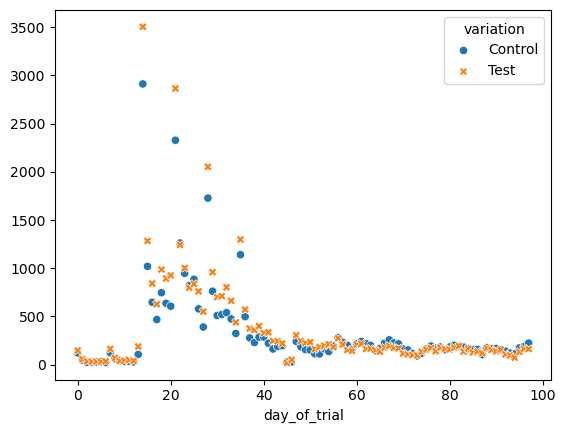

In [ ]:
# check number of visits per day for both groups
visits_daily = df.pivot_table(index="day_of_trial", values="visit_id", columns="variation", aggfunc="nunique")
sns.scatterplot(visits_daily)

### 1. Completion Rate

In [ ]:
def calculate_completion_rates(df):
    completion_counts_test = df.loc[(df['variation']=='Test')].groupby('unique_session_id')['process_step'].apply(lambda x: 'confirm' in x.values).value_counts()
    completion_counts_control = df.loc[(df['variation']=='Control')].groupby('unique_session_id')['process_step'].apply(lambda x: 'confirm' in x.values).value_counts()

    completion_rate_test = completion_counts_test.iloc[0] / (completion_counts_test.iloc[0]+ completion_counts_test.iloc[1])
    completion_rate_control = completion_counts_control.iloc[0] / (completion_counts_control.iloc[0]+ completion_counts_control.iloc[1])

    return completion_rate_control, completion_rate_test

completion_rate_control, completion_rate_test = calculate_completion_rates(df)

print(f"Completion rates per session:")
print(f"Control: {round(completion_rate_control*100, 1)}%")
print(f"Test: {round(completion_rate_test*100, 1)}%")

Completion rates per session:
Control: 50.1%
Test: 58.6%


### 2. Time Spent per Step

In [ ]:
def time_per_step(x):
    return ((x.max() - x.min()) / x.count()).total_seconds()

def calculate_average_time_spent_per_step(df):
    df_time_per_step = df.pivot_table(index=['variation', 'unique_session_id'], values='date_time', aggfunc=(time_per_step))
    avg_time_per_step_control = round(df_time_per_step.loc["Control"].mean().iloc[0], 1)
    avg_time_per_step_test = round(df_time_per_step.loc["Test"].mean().iloc[0], 1)

    return avg_time_per_step_control, avg_time_per_step_test

#### All Trial Days

In [ ]:
avg_time_per_step_control, avg_time_per_step_test = calculate_average_time_spent_per_step(df)

print(f"Average time spent per step")
print(f"Control: {avg_time_per_step_control} seconds")
print(f"Test: {avg_time_per_step_test} seconds")

Average time spent per step
Control: 49.2 seconds
Test: 52.3 seconds


#### Trial Days < 55

In [ ]:
avg_time_per_step_control, avg_time_per_step_test = calculate_average_time_spent_per_step(df.loc[df["day_of_trial"] < 55])
print(f"Average time spent per step")
print(f"Control: {avg_time_per_step_control} seconds")
print(f"Test: {avg_time_per_step_test} seconds")

Average time spent per step
Control: 49.7 seconds
Test: 53.3 seconds


#### Trial Days >= 55

In [ ]:
avg_time_per_step_control, avg_time_per_step_test = calculate_average_time_spent_per_step(df.loc[df["day_of_trial"] >= 55])
print(f"Average time spent per step")
print(f"Control: {avg_time_per_step_control} seconds")
print(f"Test: {avg_time_per_step_test} seconds")

Average time spent per step
Control: 47.9 seconds
Test: 47.4 seconds


#### Time Spent Average per Day

In [ ]:
def calculate_grouped_time_spent(df, grouping_column):
    time_spent = pd.DataFrame({"time_spent_control": df.groupby([grouping_column]).apply(lambda x: calculate_average_time_spent_per_step(x)[0], include_groups=False),
                                "time_spent_test": df.groupby([grouping_column]).apply(lambda x: calculate_average_time_spent_per_step(x)[1], include_groups=False)})
    return time_spent

# calculate average errors per day for test and control group
time_spent_daily = calculate_grouped_time_spent(df, grouping_column="day_of_trial")

# bring data into correct format for PowerBI
time_spent_daily_control = pd.DataFrame({"trial_day": time_spent_daily.index, "time_spent": time_spent_daily["time_spent_control"], "variation": "Control"})
time_spent_daily_test = pd.DataFrame({"trial_day": time_spent_daily.index, "time_spent": time_spent_daily["time_spent_test"], "variation": "Test"})
time_spent_daily_csv = pd.concat([time_spent_daily_control, time_spent_daily_test], axis=0, join='inner', ignore_index=True) #default 'outer'

# save average errors per day to csv-file
time_spent_daily_csv.to_csv("../data/cleaned/time_spent_daily.csv", index=True, decimal=',', encoding='utf-8')

### 3. Error Rate

#### All Trial Days

In [ ]:
error_rate_control, error_rate_test = calculate_avg_errors_per_visit(df)
print(f"Control: {round(error_rate_control*100, 1)}%")
print(f"Test: {round(error_rate_test*100, 1)}%")

Control: 29.7%
Test: 43.6%


#### Trial Days < 55

In [ ]:
error_rate_control, error_rate_test = calculate_avg_errors_per_visit(df.loc[df["day_of_trial"] < 55])
print(f"Control: {round(error_rate_control*100, 1)}%")
print(f"Test: {round(error_rate_test*100, 1)}%")

Control: 25.9%
Test: 43.8%


#### Trial Days >= 55

In [ ]:
error_rate_control, error_rate_test = calculate_avg_errors_per_visit(df.loc[df["day_of_trial"] >= 55])
print(f"Control: {round(error_rate_control*100, 1)}%")
print(f"Test: {round(error_rate_test*100, 1)}%")

Control: 42.1%
Test: 42.9%


#### Error rate average per 100 sessions

In [ ]:
def calculate_errors_per_step_for_each_visit(df):
    df_visits = df[['unique_session_id', 'process_step', 'date_time', 'variation']].sort_values(by=["unique_session_id", "date_time"])
    process_step_dict = {'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4}
    df_visits['process_step_number'] = df_visits['process_step'].map(process_step_dict)
    df_visits['previous_step_number'] = df_visits.groupby('unique_session_id')['process_step_number'].shift()
    df_visits['step_diff'] = df_visits['process_step_number'] - df_visits['previous_step_number']
    df_visits['step_back'] = df_visits['step_diff'].apply(lambda x: True if x < 0 else False)
    
    df_visits_grouped = df_visits.groupby(['unique_session_id'])['date_time'].first()
    df_out = pd.DataFrame({'unique_session_id': df_visits_grouped.index, 'date_time': df_visits_grouped.values})
    df_out['variation'] = df_visits.groupby(['unique_session_id'])['variation'].first().values
    df_out['total_errors'] = df_visits.groupby(['unique_session_id'])['step_back'].sum().values
    df_out['total_steps'] = df_visits.groupby(['unique_session_id'])['process_step'].count().values
    df_out['error_rate'] = df_out['total_errors'] / df_out['total_steps'].values

    return df_out

<Axes: xlabel='error_rate', ylabel='Count'>

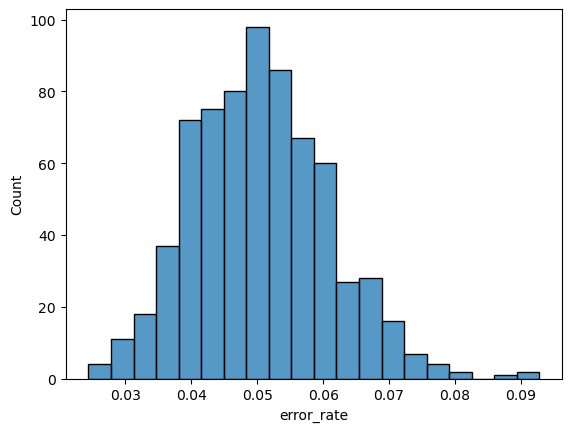

In [ ]:
df_out = calculate_errors_per_step_for_each_visit(df)

# Group by 100 sessions
df_out['group'] = df_out.index // 100

# Calculate the average for each group
result = df_out.groupby('group')['error_rate'].mean().reset_index()

result.head(15)
sns.histplot(result, x="error_rate", bins=20)

#### Error rate average per day

In [ ]:
from scipy import stats

In [ ]:
def add_moving_average(df, column, period_forwards, period_backwards):
    forwards = [k+1 for k in range(period_forwards-1)]
    backwards = [-k-1 for k in range(abs(-period_backwards+1))]
    shifts = forwards + backwards
    # start value
    df[f'{column}_mvg_avg'] = df[column]
    for k in shifts:
        df[f'{column}_mvg_avg'] += df[column].shift(k)
    df[f'{column}_mvg_avg'] = df[f'{column}_mvg_avg'] / (len(shifts)+1)

In [ ]:
def calculate_grouped_error_rates(df, grouping_column):
    error_rates = pd.DataFrame({"error_rate_control": df.groupby([grouping_column]).apply(lambda x: calculate_avg_errors_per_visit(x)[0], include_groups=False),
                                "error_rate_test": df.groupby([grouping_column]).apply(lambda x: calculate_avg_errors_per_visit(x)[1], include_groups=False)})
    return error_rates

# calculate average errors per day and visits per day
errors_daily = calculate_grouped_error_rates(df, grouping_column="day_of_trial")
visits_daily = df.pivot_table(index="day_of_trial", values="visit_id", columns="variation", aggfunc="nunique")

# calculate moving average for errors
add_moving_average(errors_daily, 'error_rate_control', 10, 10)
add_moving_average(errors_daily, 'error_rate_test', 10, 10)

# bring data into correct format for PowerBI
errors_daily_control = pd.DataFrame({"trial_day": errors_daily.index, "error_rate": errors_daily["error_rate_control"], 'error_rate_mvg_average': errors_daily['error_rate_control_mvg_avg'], "variation": "Control"})
errors_daily_test = pd.DataFrame({"trial_day": errors_daily.index, "error_rate": errors_daily["error_rate_test"], 'error_rate_mvg_average': errors_daily['error_rate_test_mvg_avg'], "variation": "Test"})

visits_daily_control = pd.DataFrame({"trial_day": visits_daily.index, "visit_count": visits_daily["Control"], "variation": "Control"})
visits_daily_test = pd.DataFrame({"trial_day": visits_daily.index, "visit_count": visits_daily["Test"], "variation": "Test"})

errors_daily_csv = pd.concat([errors_daily_control, errors_daily_test], axis=0, join='inner', ignore_index=True) #default 'outer'
visits_daily_csv = pd.concat([visits_daily_control, visits_daily_test], axis=0, join='inner', ignore_index=True) #default 'outer'

errors_and_visits_daily_csv = pd.merge(errors_daily_csv, visits_daily_csv, on=['trial_day', 'variation'], how='inner')

# save average errors per day to csv-file
errors_and_visits_daily_csv.to_csv("../data/cleaned/errors_and_visits_daily.csv", index=False, decimal=',', encoding='utf-8')

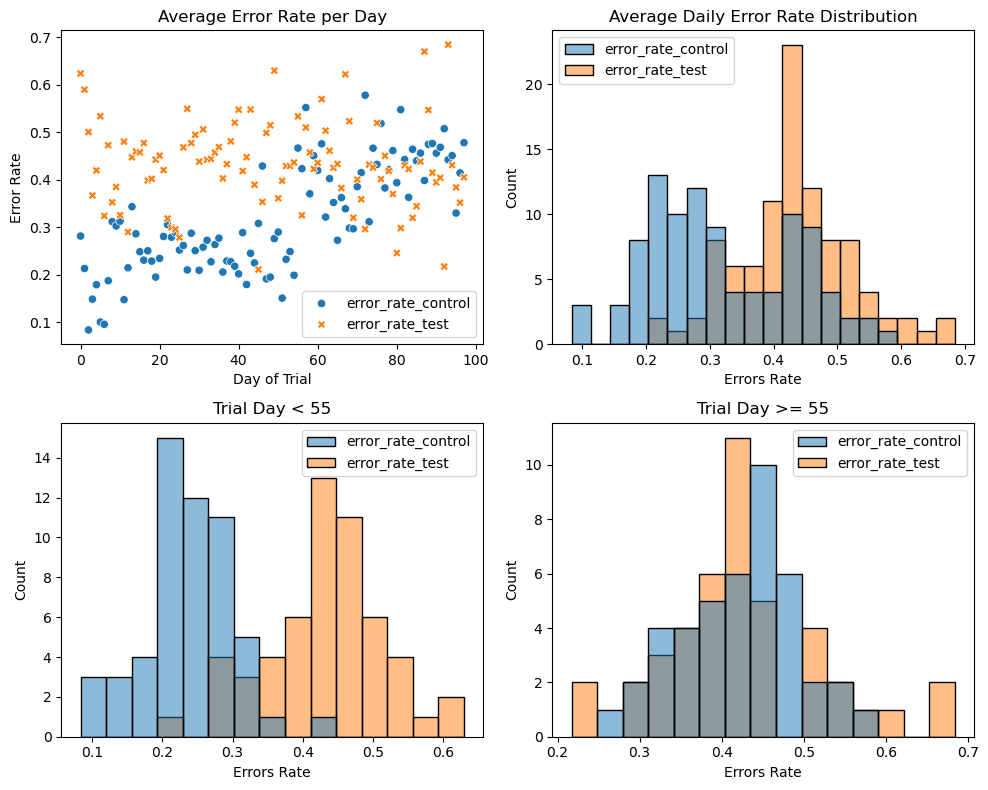

In [ ]:
# Plot average errors per day
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#
sns.scatterplot(errors_daily, ax=axs[0, 0])
axs[0, 0].set_title('Average Error Rate per Day')
axs[0, 0].set_xlabel('Day of Trial')
axs[0, 0].set_ylabel('Error Rate')

#
sns.histplot(errors_daily, bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Average Daily Error Rate Distribution')
axs[0, 1].set_xlabel('Errors Rate')
axs[0, 1].set_ylabel('Count')

# Distribution < Day 55
sns.histplot(errors_daily.loc[(errors_daily.index < 55)], bins=15, ax=axs[1, 0])
axs[1, 0].set_title('Trial Day < 55')
axs[1, 0].set_xlabel('Errors Rate')
axs[1, 0].set_ylabel('Count')

# Distribution >= Day 55
sns.histplot(errors_daily.loc[(errors_daily.index >= 55)], bins=15, ax=axs[1, 1])
axs[1, 1].set_title('Trial Day >= 55')
axs[1, 1].set_xlabel('Errors Rate')
axs[1, 1].set_ylabel('Count')

#
fig.tight_layout()
plt.show()

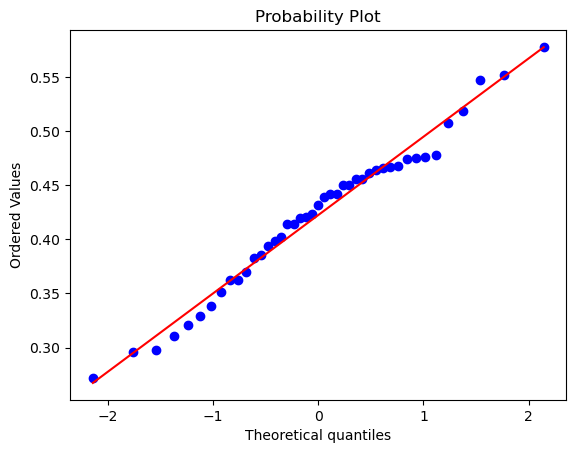

In [ ]:
# Q-Q plot for error rates per day
from scipy import stats
fig = stats.probplot(errors_daily.loc[(errors_daily.index >= 55)]['error_rate_control'], plot=plt)

## Hypothesis Testing
#### Test Group vs Control Group
* H0: Control group has the same or a higher average error rate per day compared to the test group
* H1: Control group has a lower average error rate per day compared to the test group

In [ ]:
# Trial Day >= 55
_, p_value_0 = stats.ttest_ind(errors_daily.loc[(errors_daily.index)]['error_rate_control'],
                               errors_daily.loc[(errors_daily.index)]['error_rate_test'], equal_var=False, alternative='less')

_, p_value_1 = stats.ttest_ind(errors_daily.loc[(errors_daily.index < 55)]['error_rate_control'],
                               errors_daily.loc[(errors_daily.index < 55)]['error_rate_test'], equal_var=False, alternative='less')


_, p_value_2 = stats.ttest_ind(errors_daily.loc[(errors_daily.index >= 55)]['error_rate_control'],
                               errors_daily.loc[(errors_daily.index >= 55)]['error_rate_test'], equal_var=False, alternative='less')

print(f"p-values for H0")
print(f"All Trial Days: {round(p_value_0,2)}")
print(f"Trial Day < 55: {round(p_value_1,2)}")
print(f"Trial Day >= 55: {round(p_value_2,2)}")

p-values for H0
All Trial Days: 0.0
Trial Day < 55: 0.0
Trial Day >= 55: 0.39


#### Test Group: Early vs Late Trial Days
* H0: The average error rate per day in the test group is the same before trial day 55 compared to day 55 and later
* H1: The average error rate per day in the test group is not the same before trial day 55 compared to day 55 and later

In [ ]:
# Compare test group before day 55 and after
_, p_value_3 = stats.ttest_ind(errors_daily.loc[(errors_daily.index < 55)]['error_rate_test'],
                               errors_daily.loc[(errors_daily.index >= 55)]['error_rate_test'], equal_var=False)
print(f"p-value for H0: {round(p_value_3,2)}")

p-value for H0: 0.66


#### Control Group: Early vs Late Trial Days
* H0: The average error rate per day in the test group is the same before trial day 55 compared to day 55 and later
* H1: The average error rate per day in the test group is not the same before trial day 55 compared to day 55 and later

In [ ]:
# Compare test group before day 55 and after
_, p_value_3 = stats.ttest_ind(errors_daily.loc[(errors_daily.index < 55)]['error_rate_control'],
                               errors_daily.loc[(errors_daily.index >= 55)]['error_rate_control'], equal_var=False)
print(f"p-value for H0: {round(p_value_3,2)}")

p-value for H0: 0.0


#### Error rates per hour

In [ ]:
df_['unique_hour'] = df_['date_time'].dt.floor('h').astype("int64") // 60_000_000_000

# Optional: If you want a more readable format, you can use:
# df['unique_minute_readable'] = df['datetime'].dt.strftime('%Y%m%d%H%M')

errors_per_hour = calculate_error_rates(df_, grouping_column="unique_hour")
errors_per_hour_control = errors_per_hour[['error_rate_control']]
errors_per_hour_test = errors_per_hour[['error_rate_test']]

NameError: name 'calculate_error_rates' is not defined

In [ ]:
# replace inf/-inf-values and NaNs with mean value of respective distribution
errors_per_hour_control = errors_per_hour_control.replace([np.inf, -np.inf], np.nan)
errors_per_hour_control = errors_per_hour_control.dropna()
errors_per_hour_test = errors_per_hour_test.replace([np.inf, -np.inf], np.nan)
errors_per_hour_test = errors_per_hour_test.dropna()

In [ ]:
# logarithmic transformation original distribution
errors_per_hour_transformed_control = (np.log(errors_per_hour_control.loc[errors_per_hour_control["error_rate_control"] > 0]))
errors_per_hour_transformed_test = (np.log(errors_per_hour_test.loc[errors_per_hour_test["error_rate_test"] > 0]))

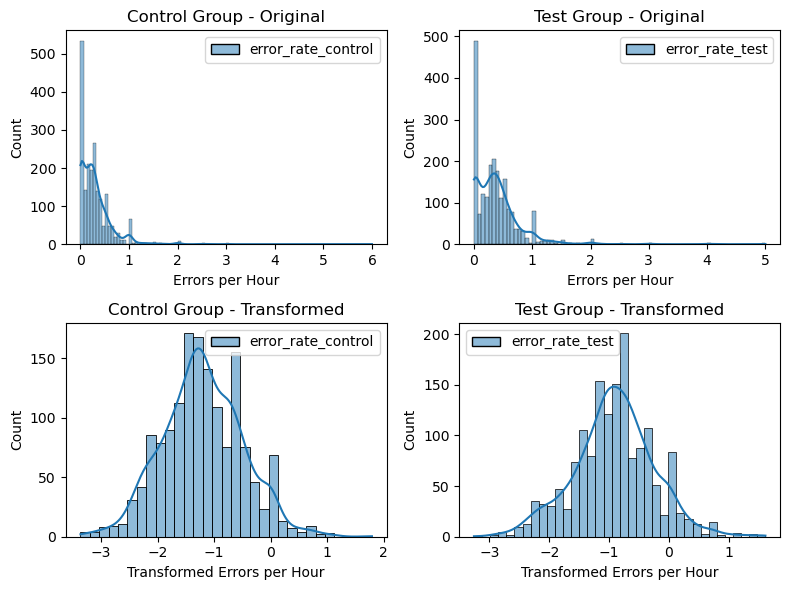

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))  # Increased figure size for better visibility

# Control group - original data
sns.histplot(errors_per_hour_control, ax=axs[0, 0], kde=True, color='blue')
axs[0, 0].set_title('Control Group - Original')
axs[0, 0].set_xlabel('Errors per Hour')
axs[0, 0].set_ylabel('Count')

# Test group - original data
sns.histplot(errors_per_hour_test, ax=axs[0, 1], kde=True, color='red')
axs[0, 1].set_title('Test Group - Original')
axs[0, 1].set_xlabel('Errors per Hour')
axs[0, 1].set_ylabel('Count')

# Control group - transformed data
sns.histplot(errors_per_hour_transformed_control, ax=axs[1, 0], kde=True, color='lightblue')
axs[1, 0].set_title('Control Group - Transformed')
axs[1, 0].set_xlabel('Transformed Errors per Hour')
axs[1, 0].set_ylabel('Count')

# Test group - transformed data
sns.histplot(errors_per_hour_transformed_test, ax=axs[1, 1], kde=True, color='lightcoral')
axs[1, 1].set_title('Test Group - Transformed')
axs[1, 1].set_xlabel('Transformed Errors per Hour')
axs[1, 1].set_ylabel('Count')

# Adjust layout and add a main title
fig.tight_layout()
plt.show()

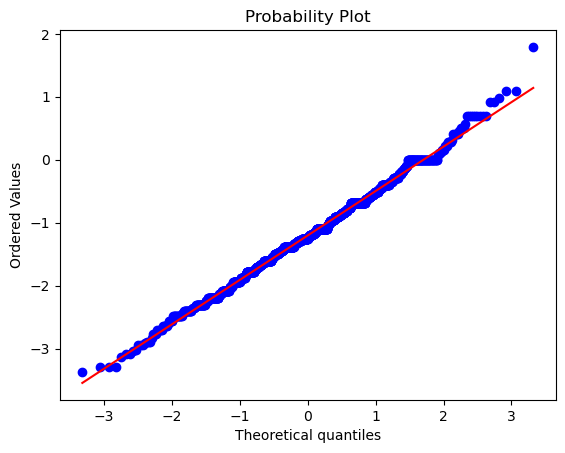

In [ ]:
# Q-Q plot for error rates per hour
from scipy import stats
fig = stats.probplot(errors_per_hour_transformed_control["error_rate_control"], plot=plt)

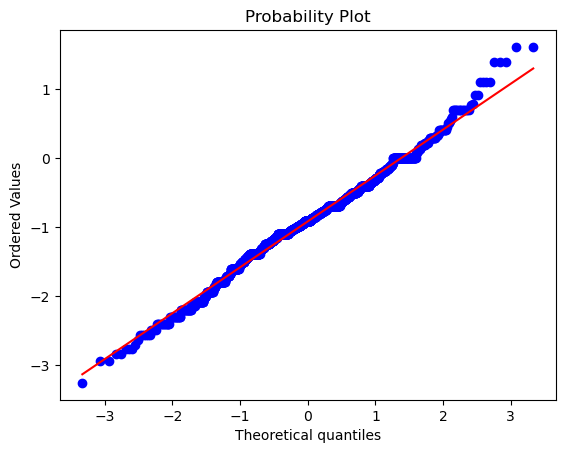

In [ ]:
# Q-Q plot for error rates per hour
from scipy import stats
fig = stats.probplot(errors_per_hour_transformed_test["error_rate_test"], plot=plt)

In [ ]:
# H0: Error rate per hour for the test group is lower than or the same as for the control group
# H1: Error rate per hour for the test group is higher than for the control group

from scipy import stats
a = errors_per_hour_transformed_control
b = errors_per_hour_transformed_test
statistic, p_value = stats.ttest_ind(a, b, equal_var=False, alternative='less')
print(f"p-value for H0: {p_value}")

p-value for H0: [5.55402588e-31]


## Experiment Evaluation

### Were clients randomly and equally divided between groups?

H0: There is no significant difference in the individuals demographic distribution between the test and control groups.

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency


df["is_female"] = df["gender"].apply(lambda x: True if x == "F" else False)
df_pivot = df.pivot_table(index='client_id',
               values=['variation', 'age', 'tenure_year', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month', 'is_female'],
               aggfunc="first")

print(f"p-value for H0")
for column in ['age', 'tenure_year', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month']:
    df_test = df_pivot.loc[(df_pivot['variation']=='Test')][column].values
    df_control = df_pivot.loc[(df_pivot['variation']=='Control')][column].values
    statistic, p_value = stats.ttest_ind(df_test, df_control, equal_var=False, alternative='less')
    print(f"{column}: {round(p_value,4)}")


total_females_control = df_pivot.loc[(df_pivot['variation']=='Control')]['is_female'].value_counts().iloc[1]
total_non_females_control = df_pivot.loc[(df_pivot['variation']=='Control')]['is_female'].value_counts().iloc[0]
total_females_test = df_pivot.loc[(df_pivot['variation']=='Test')]['is_female'].value_counts().iloc[1]
total_non_females_test = df_pivot.loc[(df_pivot['variation']=='Test')]['is_female'].value_counts().iloc[0]

array_females = np.array([[total_females_control, total_non_females_control],  # Control group (females, males)
                     [total_females_test, total_non_females_test]]) # Test group (females, males)

import numpy as np
chi2, p_value, dof, expected = chi2_contingency(array_females)
print(f"is_female: {round(p_value,4)}")

p-value for H0
age: 0.0078
tenure_year: 0.0435
number_of_accounts: 0.0179
balance: 0.3297
calls_6_month: 0.0003
logons_6_month: 0.0004
is_female: 0.5303


In [ ]:
def experiment_evalutaion(df):
    df["is_female"] = df["gender"].apply(lambda x: True if x == "F" else False)
    df_pivot = df.pivot_table(index='variation',
               values=['age', 'tenure_year', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month', 'is_female'],
               aggfunc="mean")
    print('Bias Test vs Control: ')
    for col in df_pivot.columns:
        print(f'{col}: {round(df_pivot.loc["Test"][col]/df_pivot.loc["Control"][col]-1, 2)*100}%')
    print('(Deviation of average value for test vs control group)')
    return df_pivot

experiment_evalutaion(df)

Bias Test vs Control: 
age: 1.0%
balance: 2.0%
calls_6_month: -2.0%
is_female: 4.0%
logons_6_month: -1.0%
number_of_accounts: -1.0%
tenure_year: 0.0%
(Deviation of average value for test vs control group)


,age,balance,calls_6_month,is_female,logons_6_month,number_of_accounts,tenure_year
variation,,,,,,,
Control,48.283770,158877.193834,3.267675,0.317648,6.303225,2.272571,12.167404
Test,48.721468,162318.202470,3.201920,0.329198,6.241716,2.253606,12.181982
